In [2]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.8 MB/s eta 0:00:00


In [3]:
# Step 1: Load Important Modules
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import time

print("All libraries loaded successfully!")

All libraries loaded successfully!


In [4]:
# Step 2: Load Dataset
data = {
    'Title': ['Toy Story','Inception','The Matrix','Titanic','Avatar'],
    'Genres': ['Animation|Comedy','Action|Sci-Fi','Action|Sci-Fi','Romance|Drama','Action|Adventure'],
    'Keywords': ['toys|friendship','dream|subconscious','virtual|reality','ship|love','pandora|future'],
    'Rating':[8.3,8.8,8.7,7.8,7.9]
}

df = pd.DataFrame(data)
df.head()

,Title,Genres,Keywords,Rating
0,Toy Story,Animation|Comedy,toys|friendship,8.3
1,Inception,Action|Sci-Fi,dream|subconscious,8.8
2,The Matrix,Action|Sci-Fi,virtual|reality,8.7
3,Titanic,Romance|Drama,ship|love,7.8
4,Avatar,Action|Adventure,pandora|future,7.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     5 non-null      object 
 1   Genres    5 non-null      object 
 2   Keywords  5 non-null      object 
 3   Rating    5 non-null      float64
dtypes: float64(1), object(3)
memory usage: 292.0+ bytes


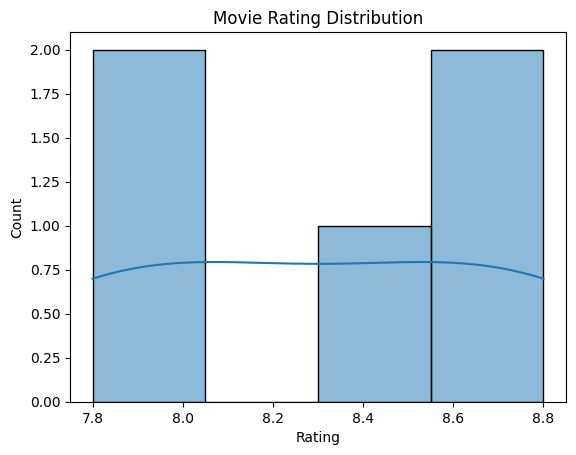

In [5]:
# Step 3: EDA
df.info()          # Check data types
df.describe()      # Basic statistics

# Plot movie rating distribution
sns.histplot(df['Rating'], kde=True)
plt.title("Movie Rating Distribution")
plt.show()

In [6]:
# Step 4: Feature Engineering
df['features'] = df['Genres'] + ' ' + df['Keywords']
df.head()

,Title,Genres,Keywords,Rating,features
0,Toy Story,Animation|Comedy,toys|friendship,8.3,Animation|Comedy toys|friendship
1,Inception,Action|Sci-Fi,dream|subconscious,8.8,Action|Sci-Fi dream|subconscious
2,The Matrix,Action|Sci-Fi,virtual|reality,8.7,Action|Sci-Fi virtual|reality
3,Titanic,Romance|Drama,ship|love,7.8,Romance|Drama ship|love
4,Avatar,Action|Adventure,pandora|future,7.9,Action|Adventure pandora|future


In [7]:
# Step 5: ML Model
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['features'])
cosine_sim = cosine_similarity(count_matrix)
print("Model is ready!")

Model is ready!


In [8]:
# Step 6: Recommendation Function
def recommend(movie_title):
    if movie_title not in df['Title'].values:
        return ['Movie not found!']
    idx = df[df['Title']==movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    recommended = [df['Title'][i[0]] for i in sim_scores[1:4]]  # top 3
    return recommended

# Test example
recommend('Toy Story')

['Inception', 'The Matrix', 'Titanic']

In [9]:
# Step 7: Save model
import pickle
with open('movie_model.pkl','wb') as f:
    pickle.dump(cosine_sim, f)
print("Model saved successfully!")

Model saved successfully!
